In [2]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import lsst.eotest.raft as raft
import matplotlib.pyplot as plt
import numpy as np
import yaml
import astropy.io.fits as pyfits

In [3]:
sensor_arr = ['S00','S01','S02','S10','S11','S12','S20','S21','S22']

qe_dict = {}
med_dict = {}
for sensor in sensor_arr:
#    path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-005/6288/qe_raft_analysis/v0/37123/'+sensor
    path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_analysis/v0/38903/'+sensor
    f = glob.glob(path+'/*.fits')
    d = pyfits.open(f[0])
    qe_dict[sensor] = d
    f_med = glob.glob(path+'/*.txt')
    med_dict[sensor] = (np.genfromtxt(f_med[0]))


[Text(0, 0, 'u'),
 Text(0, 0, 'g'),
 Text(0, 0, 'r'),
 Text(0, 0, 'i'),
 Text(0, 0, 'z'),
 Text(0, 0, 'y')]

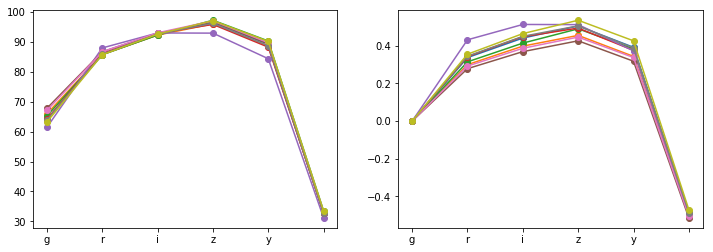

In [4]:
x = range(len(qe_dict['S00'][2].data['BAND']))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for sensor in sensor_arr:
    axes[0].plot(x, qe_dict[sensor][2].data['DEVICE_MEAN'], marker='o')
    axes[1].plot(x, qe_dict[sensor][2].data['DEVICE_MEAN']/qe_dict[sensor][2].data['DEVICE_MEAN'][0]-1, marker='o')
axes[1].set_xticklabels(qe_dict['S00'][2].data['BAND'])
axes[0].set_xticklabels(qe_dict['S00'][2].data['BAND'])


In [15]:
mean = np.zeros((len(qe_dict.keys()),len(qe_dict[list(qe_dict.keys())[0]][2].data['BAND'])))

for i,key in enumerate(sorted(qe_dict.keys())):
    for j,band in enumerate(qe_dict[key][2].data['BAND']):
        mean[i][j] = qe_dict[key][2].data['DEVICE_MEAN'][j]       

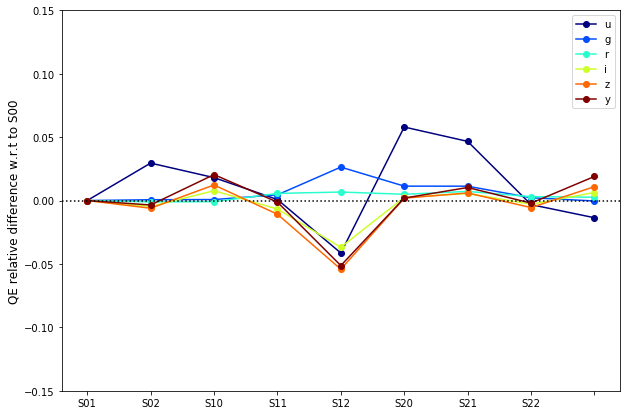

In [16]:
from matplotlib import cm
cm_subsection = np.linspace(0,1,len(qe_dict[key][2].data['BAND']))
colors = [cm.jet(x) for x in cm_subsection ]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(qe_dict.keys()))

for j,band in enumerate(qe_dict[key][2].data['BAND']):
    ax.plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o', color=colors[j])
ax.set_ylim(-0.15,0.15)
ax.set_ylabel('QE relative difference w.r.t to S00', size='large')
ax.axhline(0.0, color='k', ls=':')
ax.legend()    
fig.savefig('rel_qe_ugriz.png')

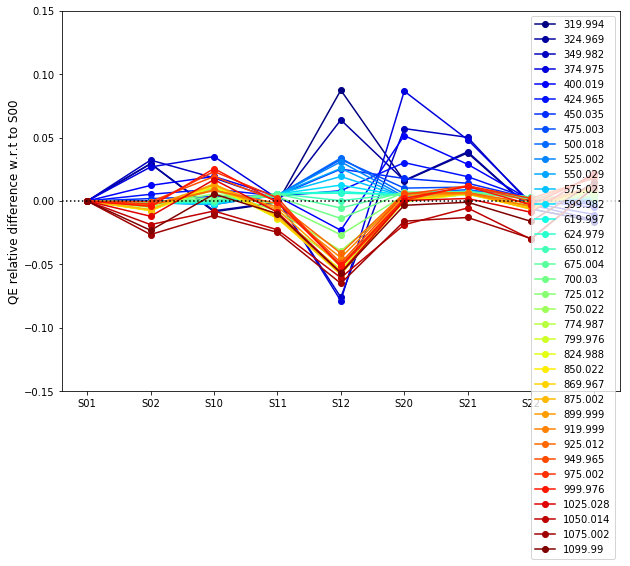

In [66]:
mean = np.zeros((len(qe_dict.keys()),len(qe_dict[key][1].data['WAVELENGTH'])))

for i,key in enumerate(sorted(qe_dict.keys())):
    for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
        mean[i][j] = qe_dict[key][1].data['DEVICE_MEAN'][j]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(qe_dict.keys()))

cm_subsection = np.linspace(0,1,len(qe_dict[key][1].data['WAVELENGTH']))
colors = [cm.jet(x) for x in cm_subsection ]

for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
    ax.plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o', color=colors[j])
ax.set_ylim(-0.15,0.15)
ax.set_ylabel('QE relative difference w.r.t to S00', size='large')
ax.axhline(0.0, color='k', ls=':')
ax.legend()    
fig.savefig('rel_qe.png')


In [67]:
seg_rel=np.zeros((len(med_dict), len(med_dict['S00'][:,0]), len(med_dict['S00'][0][3:19])))

for j,slot in enumerate(med_dict): # loop over ccd
    for i,wl in enumerate(med_dict[slot][:,0]): # loop over wl
        seg_rel[j][i] = ((med_dict[slot][i][3:19]/med_dict[slot][i][3])-1.)*100
np.shape(seg_rel) 

(9, 36, 16)

In [68]:
med_dict[slot][:,0]

array([ 319.994,  324.969,  349.982,  374.975,  400.019,  424.965,
        450.035,  475.003,  500.018,  525.002,  550.029,  575.023,
        599.982,  619.997,  624.979,  650.012,  675.004,  700.03 ,
        725.012,  750.022,  774.987,  799.976,  824.988,  850.022,
        869.967,  875.002,  899.999,  919.999,  925.012,  949.965,
        975.002,  999.976, 1025.028, 1050.014, 1075.002, 1099.99 ])

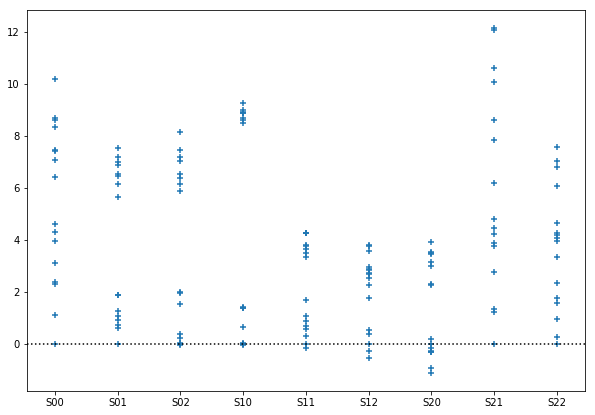

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(med_dict.keys()))
ax.set_xticks(np.arange(9))
x = np.arange(9).repeat(16)
ax.axhline(0.0, color='k', ls=':')
ax.scatter(x,seg_rel[:,3,:].ravel(), marker='+')

In [70]:
def gains(eotest_results_file):
    """
    Extract Fe55 gains from the results file of some eo testing.
    """
    results = sensorTest.EOTestResults(eotest_results_file)
    return {amp: gain for amp, gain in zip(results['AMP'], results['GAIN'])}

eo_data_path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-005/6288/collect_raft_results/v0/37124'
eotest_results_file = os.path.join(eo_data_path, 'E2V-CCD250-154_eotest_results.fits')

gains(eotest_results_file)

{1: 0.7163861,
 2: 0.7102572,
 3: 0.7120077,
 4: 0.7145804,
 5: 0.72842926,
 6: 0.72433114,
 7: 0.72872573,
 8: 0.73533034,
 9: 0.71980184,
 10: 0.7171191,
 11: 0.7180067,
 12: 0.715245,
 13: 0.7171827,
 14: 0.7118639,
 15: 0.7189494,
 16: 0.71807367}

In [49]:
sorted(med_dict.keys())

['S00', 'S01', 'S02', 'S10', 'S11', 'S12', 'S20', 'S21', 'S22']

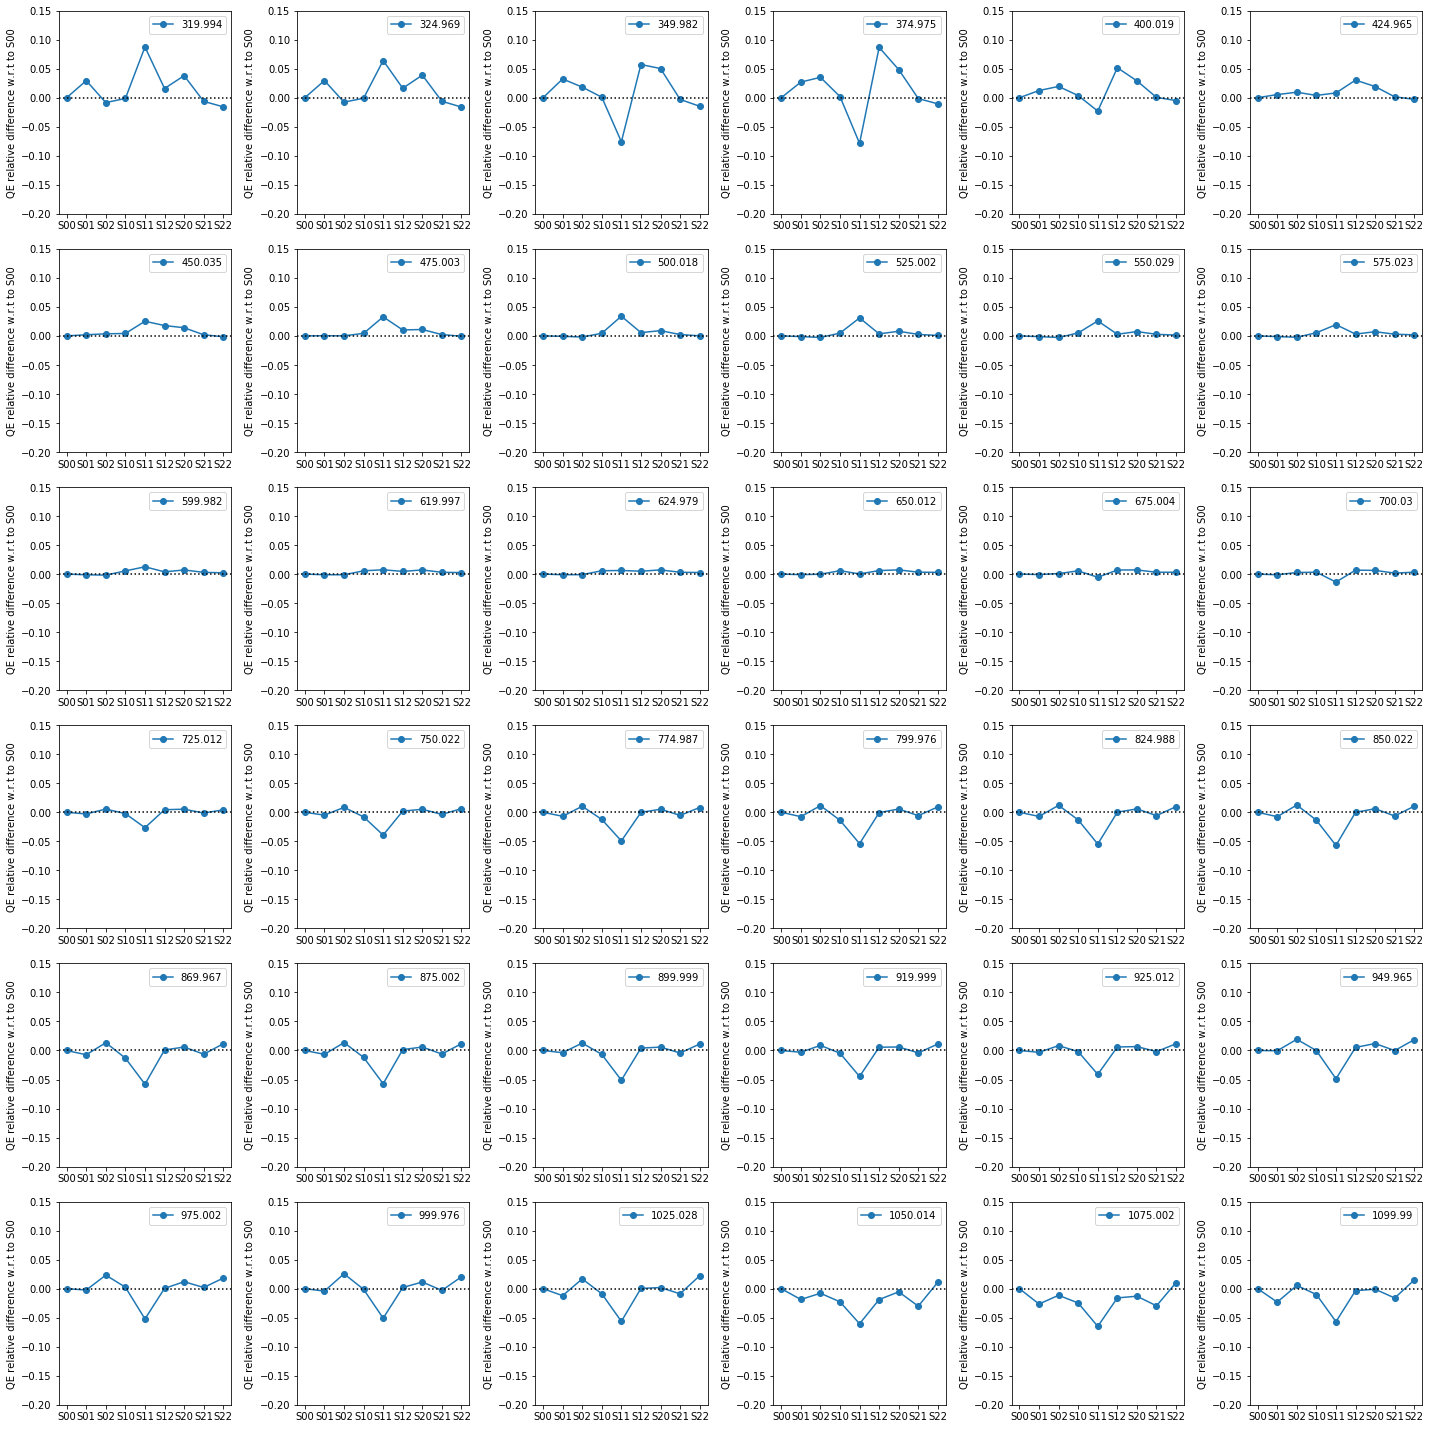

In [71]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20,20))
x = np.arange(16).repeat(9)
for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
    k = int(j/6)
    l = int(j - 6*k)
    axes[k][l].plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o')
    axes[k][l].set_ylim(-0.20,0.15)
    axes[k][l].set_ylabel('QE relative difference w.r.t to S00')
    axes[k][l].axhline(0.0, color='k', ls=':')
    axes[k][l].set_xticklabels(sorted(med_dict.keys()))
    axes[k][l].set_xticks(np.arange(9))
    axes[k][l].legend()
    
fig.tight_layout()    
fig.savefig('rel_qe.png')

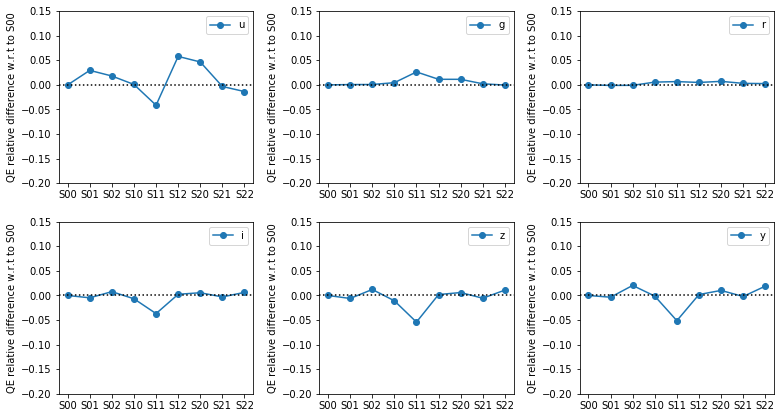

In [72]:
mean = np.zeros((len(qe_dict.keys()),len(qe_dict[list(qe_dict.keys())[0]][2].data['BAND'])))

for i,key in enumerate(sorted(qe_dict.keys())):
    for j,band in enumerate(qe_dict[key][2].data['BAND']):
        mean[i][j] = qe_dict[key][2].data['DEVICE_MEAN'][j]       

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,6))
x = np.arange(16).repeat(9)
for j,band in enumerate(qe_dict[key][2].data['BAND']):
    k = int(j/3)
    l = int(j - 3*k)
    axes[k][l].plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o')
    axes[k][l].set_ylim(-0.20,0.15)
    axes[k][l].set_ylabel('QE relative difference w.r.t to S00')
    axes[k][l].axhline(0.0, color='k', ls=':')
    axes[k][l].set_xticklabels(sorted(med_dict.keys()))
    axes[k][l].set_xticks(np.arange(9))
    axes[k][l].legend()
    
fig.tight_layout()    
fig.savefig('rel_qe.png')

In [55]:
seg_rel[:,0,:]

array([[ 0.        ,  1.16460167,  2.42334505,  2.29540543,  3.06219526,
         3.92428096,  4.58621462,  4.23609159,  8.1348581 ,  7.97298788,
         7.83252599,  6.99863075,  6.71604215,  6.18202767,  7.32086978,
        10.15754158],
       [ 0.        ,  0.71184035,  0.85483341,  1.22065332,  0.95723399,
         0.84838435,  1.92307836,  2.28003443,  6.17681012,  6.80260619,
         6.4331891 ,  5.87302682,  6.60739921,  6.71075374,  7.12496669,
         6.67423532],
       [ 0.        ,  0.11144775,  0.28057618,  0.55595533,  0.86690683,
         2.19230397,  2.70362362,  2.81305442,  9.36598247,  8.21392061,
         7.8623255 ,  8.10310675,  6.75109588,  6.40753725,  6.67086688,
         5.85228919],
       [ 0.        , -0.04089578,  0.10261208,  0.03520138,  0.67841381,
         1.51374315,  1.386547  ,  1.42688364,  9.22655683,  8.91703294,
         9.06401952,  8.56104328,  8.46577169,  9.02355344,  8.43834565,
         8.45937847],
       [ 0.        , -0.07587014,  0

In [56]:
x

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15])